Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
# Importing required libraries

import pathlib
import tensorflow as tf
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import layers
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,Input,Activation,BatchNormalization,MaxPooling2D

import seaborn as sns
import matplotlib.pyplot as plt

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
# Defining the path for train and test images

data_dir_train = pathlib.Path('/content/drive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
data_dir_test = pathlib.Path('/content/drive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2241
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
def scale(image, label):
    return tf.image.convert_image_dtype(image, tf.float32), label

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2241 files belonging to 9 classes.
Using 1793 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size,
)

Found 2241 files belonging to 9 classes.
Using 448 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

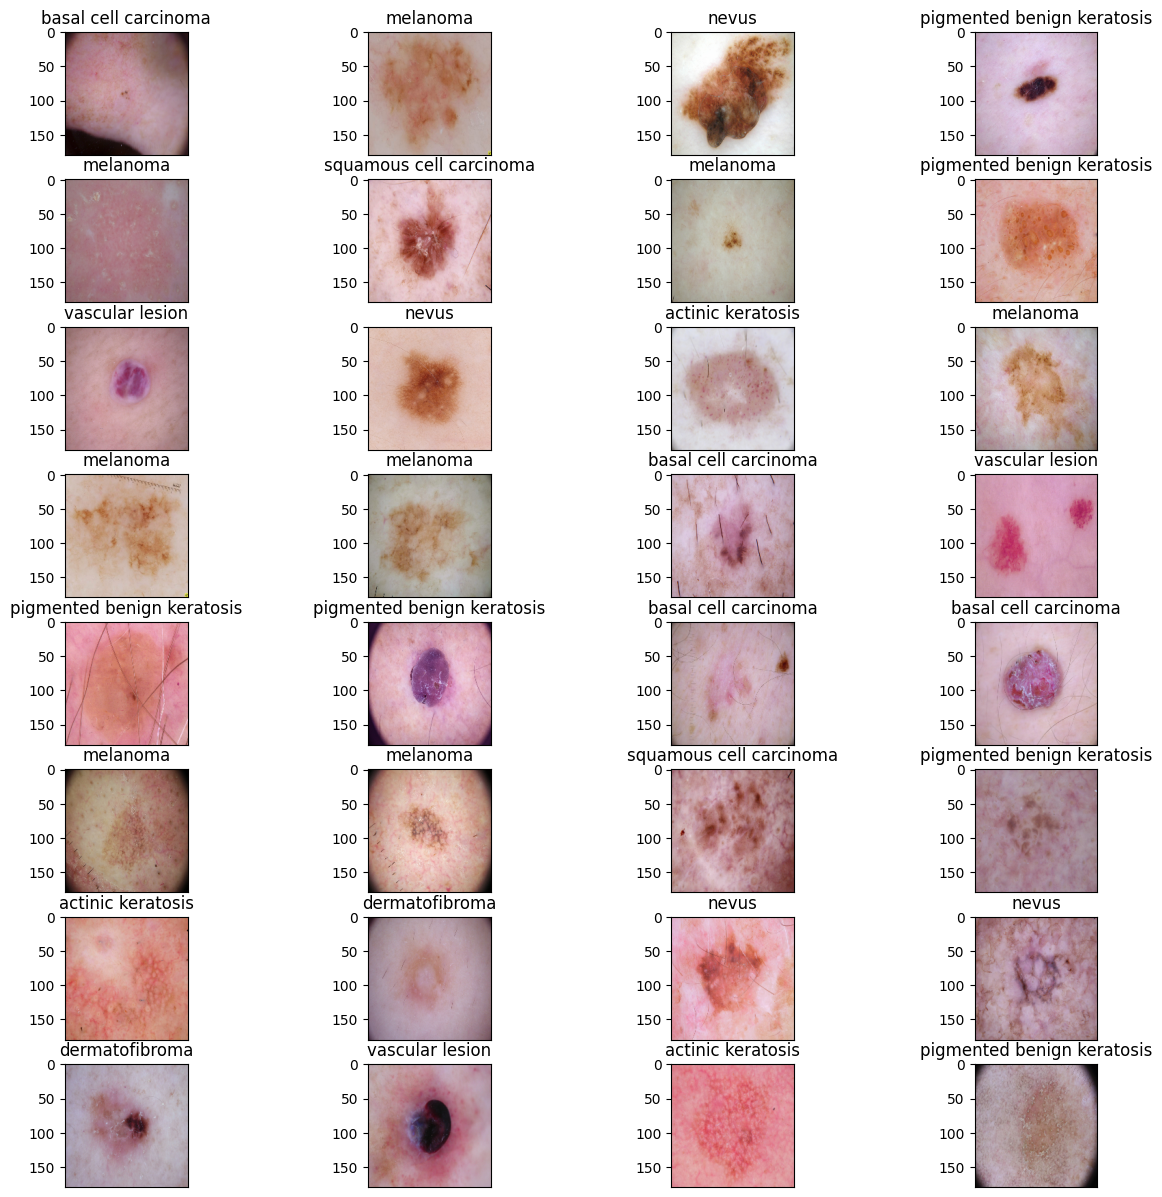

In [10]:
import matplotlib.pyplot as plt
for batch in train_ds:
    plt.figure(figsize=(15,15))
    images = batch[0]
    labels = batch[1]
    for i in range(len(labels)):
        plt.subplot(8, 4,i+1)
        plt.imshow(tf.cast(images[i],dtype=tf.uint32))
        plt.title(train_ds.class_names[labels[i]])
        plt.tick_params(axis='x',which='both', bottom=False, top=False, labelbottom=False)
    break
### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [12]:
#CNN Model

#Sequential model with  first Rescaling layer
model = Sequential([
                    layers.Rescaling(1./255,input_shape=(180,180,3))
])

# 1 Conv layer with 1 MaxPool Layer (1st CNN layer)
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# 1 Conv layer with 1 MaxPool Layer (2nd CNN layer)
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# 1 Conv layer with 1 MaxPool Layer (3rd CNN layer)
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer
model.add(layers.Dropout(0.5))

#Flatten Layer
model.add(layers.Flatten())

# Fully Connected Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dropout layer
model.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
model.add(layers.Dense(9, activation='softmax'))


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [13]:
### Lets choose an appropirate optimiser and loss function
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

### Train the model

In [15]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


57/57 [==============================] - 349s 3s/step - loss: 2.1165 - accuracy: 0.2242 - val_loss: 1.8011 - val_accuracy: 0.3415
Epoch 2/20
57/57 [==============================] - 121s 2s/step - loss: 1.7590 - accuracy: 0.3608 - val_loss: 1.7843 - val_accuracy: 0.3393
Epoch 3/20
57/57 [==============================] - 115s 2s/step - loss: 1.6189 - accuracy: 0.4322 - val_loss: 1.5326 - val_accuracy: 0.4821
Epoch 4/20
57/57 [==============================] - 117s 2s/step - loss: 1.4613 - accuracy: 0.4813 - val_loss: 1.4573 - val_accuracy: 0.4888
Epoch 5/20
57/57 [==============================] - 117s 2s/step - loss: 1.6245 - accuracy: 0.4255 - val_loss: 1.7785 - val_accuracy: 0.3348
Epoch 6/20
57/57 [==============================] - 119s 2s/step - loss: 1.7041 - accuracy: 0.3731 - val_loss: 1.5994 - val_accuracy: 0.4643
Epoch 7/20
57/57 [==============================] - 120s 2s/step - loss: 1.5291 - accuracy: 0.4646 - val_loss: 1.5487 - val_accuracy: 0.4576
Epoch 8/20
57/57 [======

### Visualizing training results

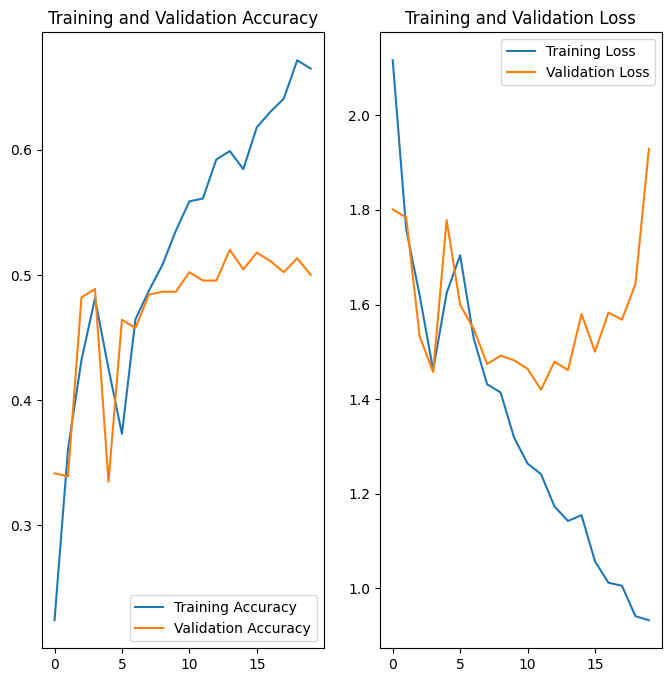

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here
We can see that the model is overfitting as training accuracy is very high and validation accuracy is very low.

Lets try batch normalization to avoid overfitting

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

### Todo:
### Create the model, compile and train the model


In [17]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model = keras.Sequential([
                          layers.Rescaling(1./255,input_shape=(180,180,3)),
    layers.RandomFlip(mode="horizontal_and_vertical"),
                             layers.RandomRotation(0.2),
                             layers.RandomZoom(height_factor=(0.3), width_factor=(0.3))
])


In [18]:
#CNN Model

#Sequential model with  first Rescaling layer
model = Sequential([
                    layers.Rescaling(1./255,input_shape=(180,180,3))
])

# 1 Conv layer with 1 MaxPool Layer (1st CNN layer)
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))


# 1 Conv layer with 1 MaxPool Layer (2nd CNN layer)
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))


# 1 Conv layer with 1 MaxPool Layer (3rd CNN layer)
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))


#Dropout layer
model.add(layers.Dropout(0.5))

#Flatten Layer
model.add(layers.Flatten())

# Fully Connected Dense Layer
model.add(layers.Dense(128,activation='relu'))
model.add(layers.BatchNormalization())

#Dropout layer
model.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
model.add(layers.Dense(9, activation='softmax'))



### Compiling the model

In [19]:
## Your code goes here
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [20]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(train_ds, validation_data=val_ds, epochs=20)


Epoch 1/20
57/57 [==============================] - 120s 2s/step - loss: 1.9312 - accuracy: 0.3408 - val_loss: 3.6110 - val_accuracy: 0.1496
Epoch 2/20
57/57 [==============================] - 118s 2s/step - loss: 1.6349 - accuracy: 0.4378 - val_loss: 2.3628 - val_accuracy: 0.2969
Epoch 3/20
57/57 [==============================] - 116s 2s/step - loss: 1.4986 - accuracy: 0.4969 - val_loss: 1.8482 - val_accuracy: 0.3594
Epoch 4/20
57/57 [==============================] - 119s 2s/step - loss: 1.4245 - accuracy: 0.5131 - val_loss: 1.5368 - val_accuracy: 0.4888
Epoch 5/20
57/57 [==============================] - 117s 2s/step - loss: 1.3284 - accuracy: 0.5332 - val_loss: 1.4171 - val_accuracy: 0.5000
Epoch 6/20
57/57 [==============================] - 119s 2s/step - loss: 1.3263 - accuracy: 0.5354 - val_loss: 1.7039 - val_accuracy: 0.4442
Epoch 7/20
57/57 [==============================] - 117s 2s/step - loss: 1.2706 - accuracy: 0.5521 - val_loss: 1.5476 - val_accuracy: 0.4487
Epoch 8/20
57

### Visualizing the results

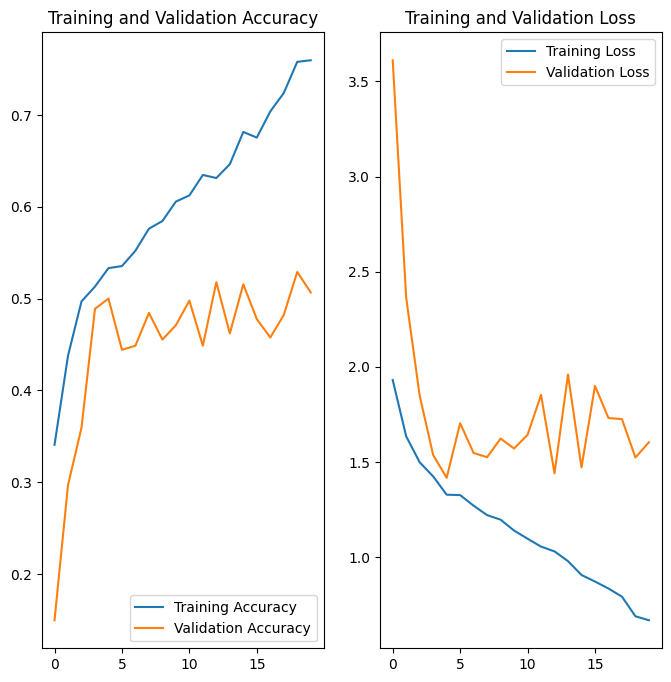

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

## Yes, we can observe some improvement in the model, but there is still scope for further reduction of over and under fitting.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [22]:
## Your code goes here.
def class_distribution_count(directory):

    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]

    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])


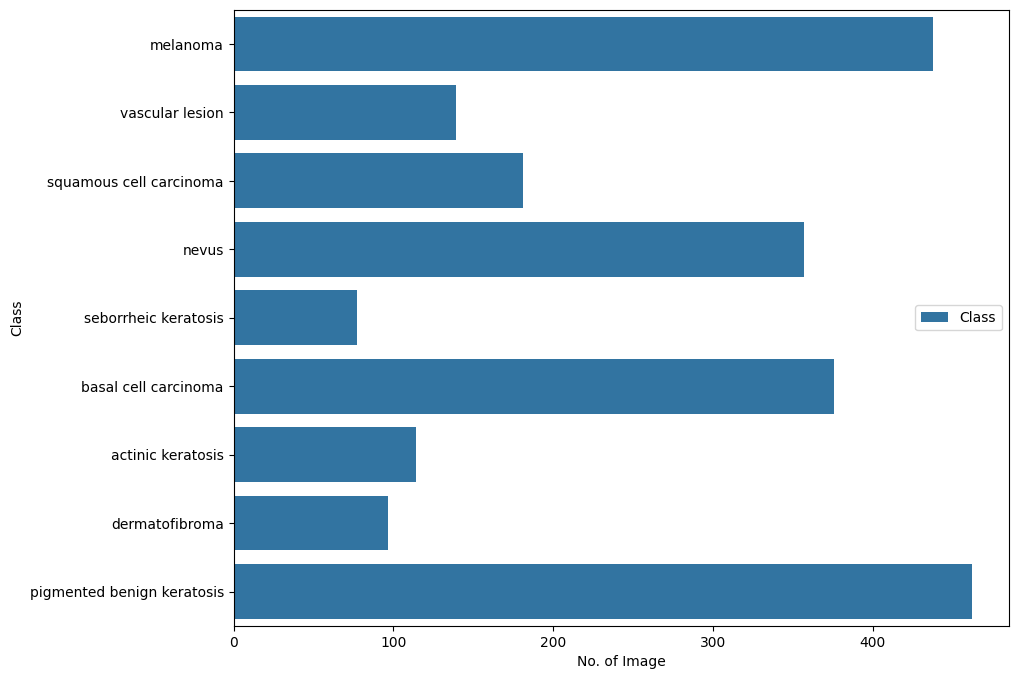

In [23]:
df = class_distribution_count(data_dir_train)
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Image", y="Class", data=df, label="Class")
plt.show()

In [24]:
countList=[]
classList=[]
for i in class_names:
    count = 0
    for j in data_dir_train.glob(i+'/*.jpg'):
        count += 1
    classList.append(i)
    countList.append(count)

In [25]:
df= pd.DataFrame({'class':classList,'count':countList})
df

,class,count
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,97
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - Answer: seborrheic keratosis
#### - Which classes dominate the data in terms proportionate number of samples?
#### - Answer: pigmented benign keratosis


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [29]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [31]:
import Augmentor

In [38]:
path_to_training_dataset="/content/drive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x781C84E1B370>: 100%|██████████| 500/500 [00:23<00:00, 21.60 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x781C8791ADA0>: 100%|██████████| 500/500 [00:24<00:00, 20.04 Samples/s]


Initialised with 97 image(s) found.
Output directory set to /content/drive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x781C8783ECB0>: 100%|██████████| 500/500 [00:24<00:00, 20.47 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x781C84E53D30>: 100%|██████████| 500/500 [01:40<00:00,  4.99 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x781C84CBE110>: 100%|██████████| 500/500 [01:35<00:00,  5.24 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x781C892F4D60>: 100%|██████████| 500/500 [00:22<00:00, 21.94 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x781C89480280>: 100%|██████████| 500/500 [00:49<00:00, 10.20 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x781C9D97B460>: 100%|██████████| 500/500 [00:24<00:00, 20.00 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Upgrad/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x781C9FFD7A60>: 100%|██████████| 500/500 [00:24<00:00, 20.27 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [39]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [48]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
# path_list

lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
# lesion_list_new

dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
# new_df = original_df.append(df2)


#created 500 samples for each
df2['Label'].value_counts()

Label
melanoma                      500
vascular lesion               500
squamous cell carcinoma       500
nevus                         500
seborrheic keratosis          500
basal cell carcinoma          500
actinic keratosis             500
dermatofibroma                500
pigmented benign keratosis    500
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [50]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [64]:
data_dir_train=data_dir_train
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(180,180),
  batch_size=batch_size)

Found 6741 files belonging to 9 classes.
Using 5393 files for training.


#### **Todo:** Create a validation dataset

In [65]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(180, 180),
  batch_size=batch_size)

Found 6741 files belonging to 9 classes.
Using 1348 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [66]:
## your code goes here
#CNN Model

#Sequential model with  first Rescaling layer
model = Sequential([
                    layers.Rescaling(1./255,input_shape=(180,180,3))
])

# 1 Conv layer with 1 MaxPool Layer (1st CNN layer)
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# 1 Conv layer with 1 MaxPool Layer (2nd CNN layer)
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# 1 Conv layer with 1 MaxPool Layer (3rd CNN layer)
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer
model.add(layers.Dropout(0.5))

#Flatten Layer
model.add(layers.Flatten())

# Fully Connected Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dropout layer
model.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
model.add(layers.Dense(9, activation='softmax'))


In [67]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 43, 43, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 41, 41, 128)      

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [74]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model
keeping epoch as 20 due to time and ram constraints

In [76]:
epochs = 20
## Your code goes here, use 50 epochs.

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 391s 2s/step - loss: 1.4828 - accuracy: 0.4319 - val_loss: 1.4096 - val_accuracy: 0.4473
Epoch 2/20
169/169 [==============================] - 395s 2s/step - loss: 1.3823 - accuracy: 0.4791 - val_loss: 1.6254 - val_accuracy: 0.4117
Epoch 3/20
169/169 [==============================] - 400s 2s/step - loss: 1.2602 - accuracy: 0.5246 - val_loss: 1.2284 - val_accuracy: 0.5490
Epoch 4/20
169/169 [==============================] - 406s 2s/step - loss: 1.1291 - accuracy: 0.5802 - val_loss: 1.0552 - val_accuracy: 0.5972
Epoch 5/20
169/169 [==============================] - 399s 2s/step - loss: 1.0303 - accuracy: 0.6088 - val_loss: 0.9553 - val_accuracy: 0.6254
Epoch 6/20
169/169 [==============================] - 392s 2s/step - loss: 0.9284 - accuracy: 0.6427 - val_loss: 0.9402 - val_accuracy: 0.6573
Epoch 7/20
169/169 [==============================] - 405s 2s/step - loss: 0.8735 - accuracy: 0.6625 - val_loss: 0.9704 - val_accuracy: 0.6439

#### **Todo:**  Visualize the model results

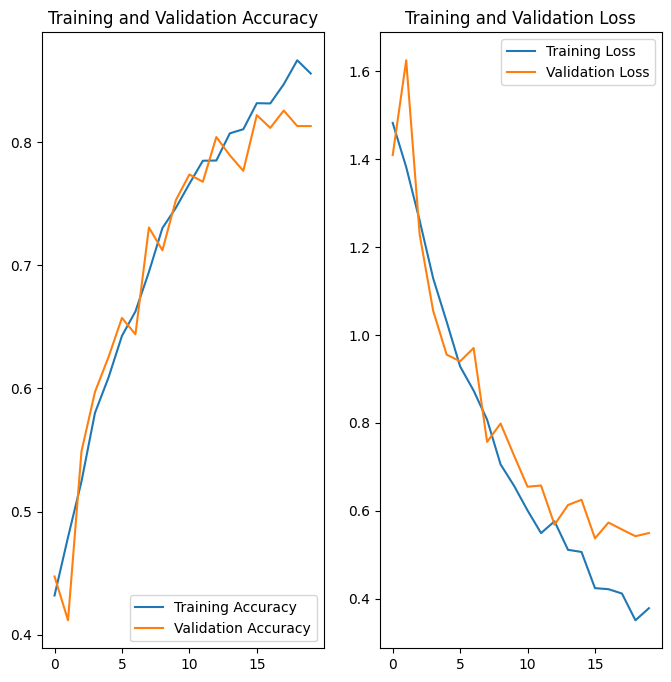

In [77]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

### Yes, our analysis indicates that we have successfully handled overfitting and underfitting as the difference between training and validation accuracy is within a range.